C:\Users\USVV724227\AppData\Local\Temp\ipykernel_34700\532580686.py:7: DtypeWarning: Columns (1,8,19,20,21,22,23,24,25,26,27,29,30,31,32,33,34,35,36,37,38,40,41,47,52,58,63,67,69,71,73,77,84,86,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,122,136,137,140,141,149,151,157,159,161,173,177,186,187,190,193,197,212,214,215,216,217,218,219,220,221,222,223,246,253,254,258,259,261,262,280,298,300,301,303,319,321,343) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/processed/data_model_output.csv')


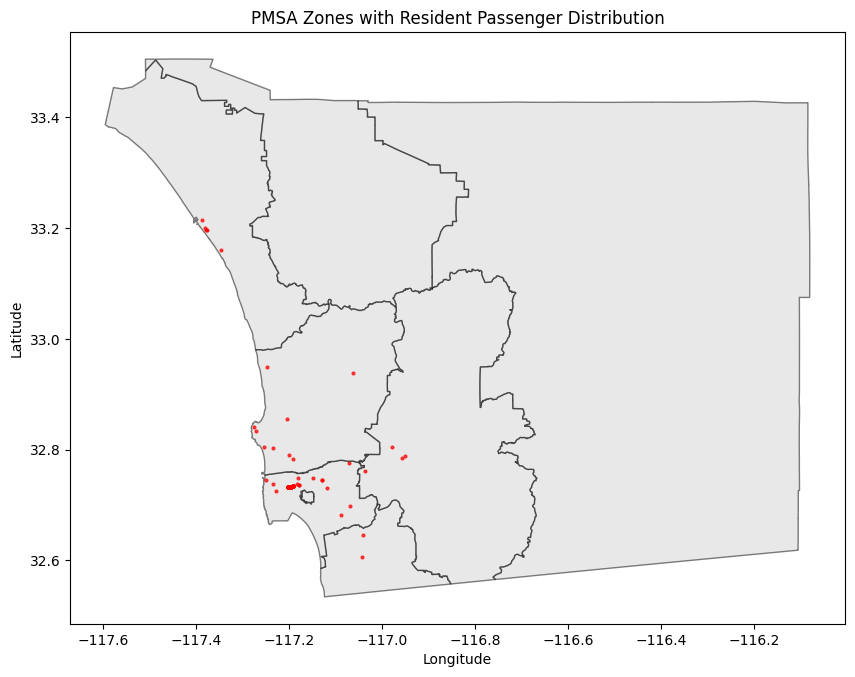

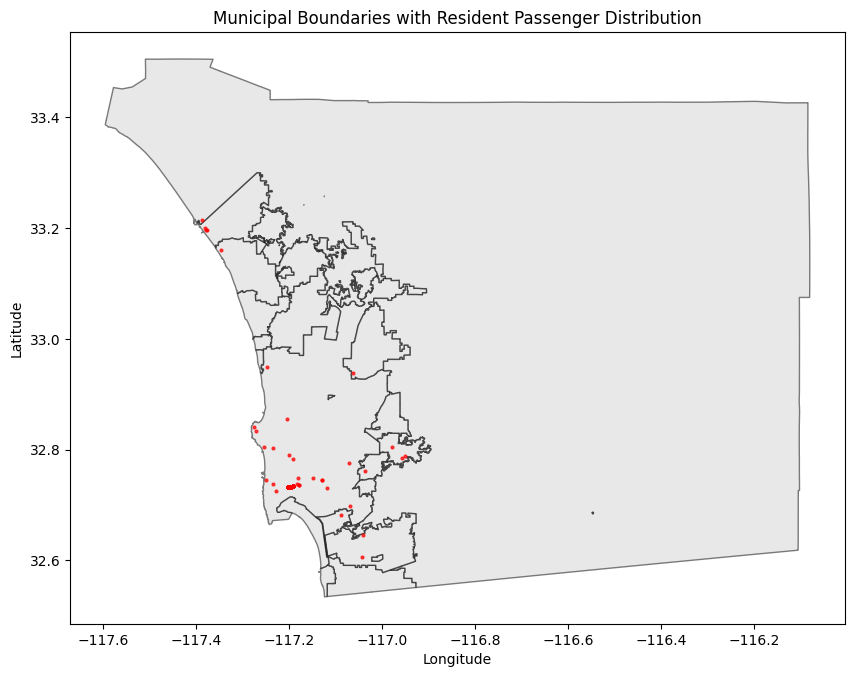

In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Point

# Load the dataset
df = pd.read_csv('../data/processed/data_model_output.csv')

# Create resident_latitude, resident_longitude, and pmsa fields
filtered_df = df[
    (df["record_type_synthetic"] == 0) & (df['is_completed'] == 1) &
    (df["passenger_segment_label"].isin(["RESIDENT_ARRIVING", "RESIDENT_DEPARTING"]))
].copy()

filtered_df["resident_latitude"] = filtered_df.apply(
    lambda row: row["origin_latitude"] if row["passenger_type_label"] == "RESIDENT_ARRIVING" else row["destination_latitude"], axis=1)
filtered_df["resident_longitude"] = filtered_df.apply(
    lambda row: row["origin_longitude"] if row["passenger_type_label"] == "RESIDENT_ARRIVING" else row["destination_longitude"], axis=1)
filtered_df["pmsa"] = filtered_df.apply(
    lambda row: row["origin_pmsa"] if row["passenger_type_label"] == "RESIDENT_ARRIVING" else row["destination_pmsa"], axis=1)

# Filter out pmsa == 99
filtered_df = filtered_df[filtered_df["pmsa"] != 99]

# Convert to GeoDataFrame
geometry = [Point(xy) for xy in zip(filtered_df['resident_longitude'], filtered_df['resident_latitude'])]
coords_gdf = gpd.GeoDataFrame(filtered_df, geometry=geometry, crs="EPSG:4326")

# Load PMSA and Municipal zones shapefiles
pmsa_zones_gdf = gpd.read_file("../data/external/geometry/pmsa_geoms/pmsa_geoms.shp").to_crs(epsg=4326)
municipal_zones_gdf = gpd.read_file("../data/external/geometry/Municipal_Boundaries/Municipal_Boundaries.shp").to_crs(epsg=4326)

# Plot PMSA Zones with Points
fig, ax = plt.subplots(figsize=(10, 10))
pmsa_zones_gdf.plot(ax=ax, color='lightgrey', edgecolor='black', alpha=0.5)
coords_gdf.plot(ax=ax, markersize=4, color='red', alpha=0.7)
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.set_title("PMSA Zones with Resident Passenger Distribution")
plt.show()

# Plot Municipal Boundaries with Points
fig, ax = plt.subplots(figsize=(10, 10))
municipal_zones_gdf.plot(ax=ax, color='lightgrey', edgecolor='black', alpha=0.5)
coords_gdf.plot(ax=ax, markersize=4, color='red', alpha=0.7)
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.set_title("Municipal Boundaries with Resident Passenger Distribution")
plt.show()


In [2]:
len(coords_gdf)

1597